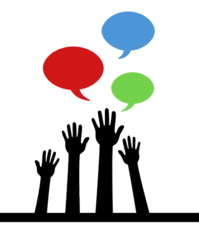

<center><font color=orange size=12px>The Sparks Foundation</font></center>

# predicting the optimum number of clusters and representing it visually.

## Author: Anna Sai Nikhil

### GRIPNOV20

<b> Task 2</b>

### Dataset : The data set can be downloaded from https://bit.ly/3kXTdox or from sklearn datasets

In [145]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import datasets

#For visulization
import matplotlib.pyplot as plt
import seaborn as sns

#for clusters
from sklearn.cluster import KMeans

In [161]:
# Load the iris dataset
input = pd.read_csv('Iris.csv')
input.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [147]:
input.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [148]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [149]:
plotable=input.iloc[:,1:5]
plotable

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Understanding the data

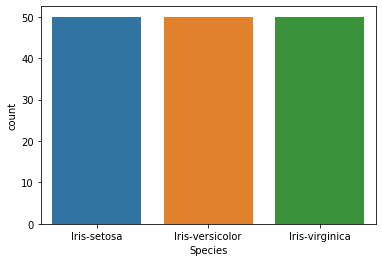

In [264]:
sns.countplot(input['Species'])

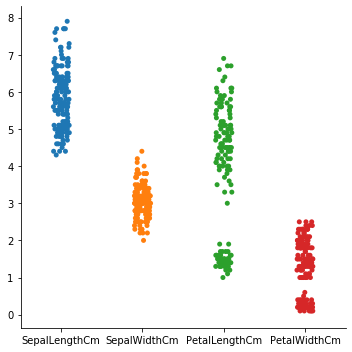

In [265]:
sns.catplot(data=plotable)

F:\anaconda3\envs\Machine Learning\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


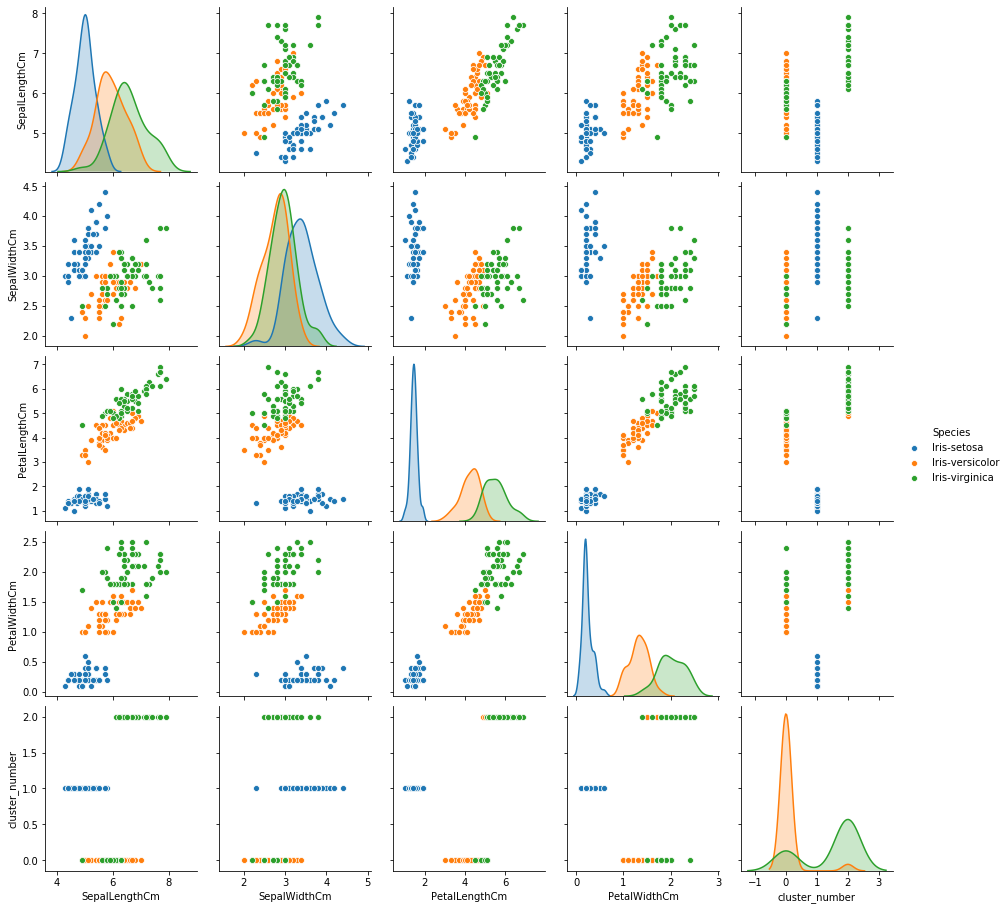

In [266]:
input1=input.iloc[:,1:]
input1
sns.pairplot(input1, hue="Species", height=2.5)

## <center> Clusters

In [267]:
k=[]
for i in range(1,100):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
    kmeans.fit(plotable.iloc[:,[0,1,2,3]])
    k.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow method')

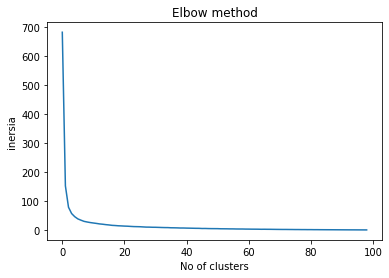

In [268]:
plt.plot(k)
plt.xlabel('No of clusters')
plt.ylabel('inersia')
plt.title('Elbow method')

In [269]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(plotable)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [270]:
input['cluster_number']=kmeans.labels_

In [271]:
input.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_number
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


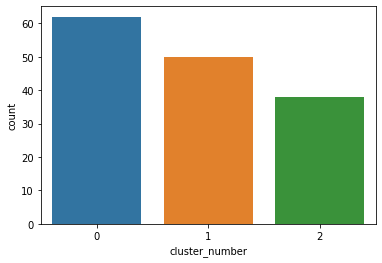

In [275]:
sns.countplot(input.cluster_number)

In [276]:
confusion_data=input.iloc[:,-2:]
pd.options.display.max_rows = 10
confusion_data

,Species,cluster_number
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
...,...,...
145,Iris-virginica,2
146,Iris-virginica,0
147,Iris-virginica,2
148,Iris-virginica,2


In [277]:
confusion_datan=confusion_data
confusion_datan['real']=0
confusion_datan

,Species,cluster_number,real
0,Iris-setosa,1,0
1,Iris-setosa,1,0
2,Iris-setosa,1,0
3,Iris-setosa,1,0
4,Iris-setosa,1,0
...,...,...,...
145,Iris-virginica,2,0
146,Iris-virginica,0,0
147,Iris-virginica,2,0
148,Iris-virginica,2,0


In [278]:
confusion_datan.loc[(confusion_datan['Species'] == 'Iris-setosa'), 'real'] = 1
confusion_datan.loc[(confusion_datan['Species'] == 'Iris-virginica'), 'real'] = 2

In [279]:
real=confusion_datan.real
reel=confusion_datan.cluster_number
heatmapper=pd.DataFrame()
heatmapper['real']=real
heatmapper['reel']=reel

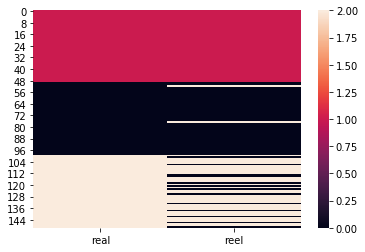

In [280]:
sns.heatmap(data=heatmapper)

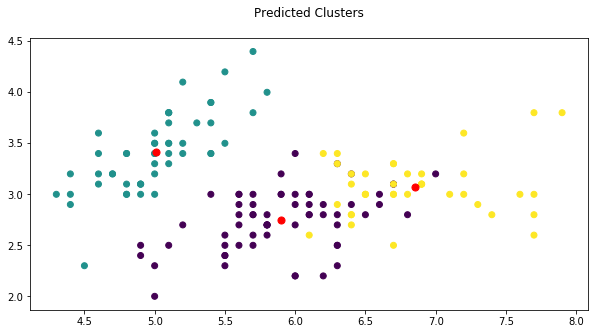

In [281]:
plt.figure(figsize=(10,5))
plt.scatter(input['SepalLengthCm'], input['SepalWidthCm'], c=input.cluster_number)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=50, c='red')
plt.show()
